# K-Nearest Neighbors

In this notebook you will implement a simple K-NN algorithm and try to see the effect of using different values for the parameter k. Source for the excercise was the book of A.Géron , "Hands-On Machine Learning with Keras, Scikit & Tensorflow", O'Reilly. 
In this exercise we will work with Life satisfaction and GDP Data and we will try to predict the numerical value for Life statisfaction index of Cyprus, based on its GDP.
Add your code where indicated with "#### ADD YOUR CODE HERE#####"

The next function is just a util-function to prepare the data.

In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):# function nimmt zwei DF als Eingabe 
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"] # Filtert die Daten nach der Spalte "INEQUALITY" und behält nur die Zeilen, die den Wert "TOT" enthalten
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value") # Daten werden neu organisiert, Länder werden zum index, indicators zu den Spalten und values zu den Werten
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True) # Spalte "2015" wird umbenannt in "GDP per capita"
    gdp_per_capita.set_index("Country", inplace=True) # Spalte "Country" wird zum Index gemacht
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, # beide DF werden zusammengeführt, Ergebnis wird in full_country_stats gespeichert und gibt Lebenszufriedenheit und GDP pro Kopf zurück
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)  # sortiert die Daten nach GDP pro Kopf
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices] # gibt nur die spalten GDP pro Kopf und Lebenszufriedenheit für die ausgewählten Indizes zurück

The module we need to import to implement the algorithm is sklearn.neighbors.
The 2 datafiles "oecd_bli_2015.csv" and "gdp_per_capita.csv" should be in the same folder as this notebook.

[[6.372]]


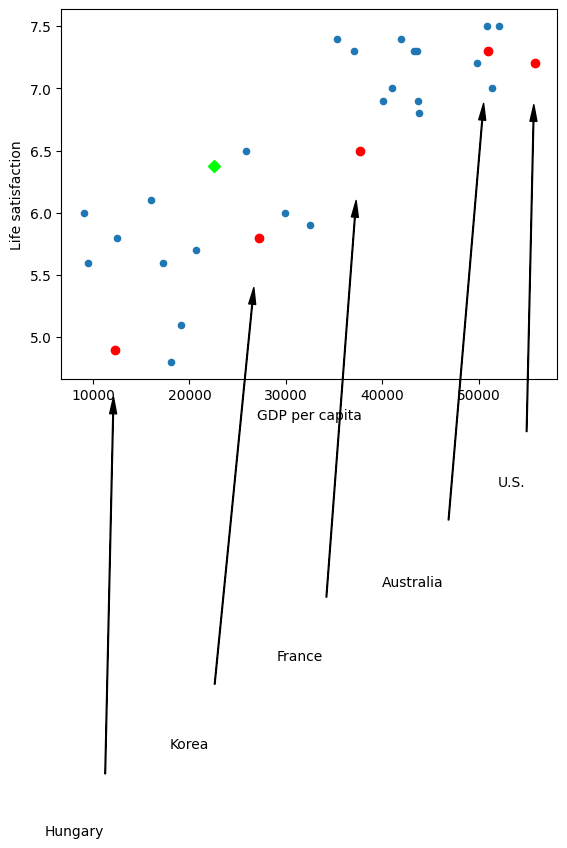

In [10]:
import matplotlib.pyplot as plt # Datenvisualisierung
import numpy as np # mathematische Funktionen
import pandas as pd # Data Frames 
import sklearn.neighbors # Enthält KNN Algorithmen

# Load the data
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita) #zuvor definierte Funktion wird aufgerufen -> kombiniert und bereinigt die beiden geladenen Datensätze 
X = np.c_[country_stats["GDP per capita"]] # enthält die GDP pro Kopf Werte
y = np.c_[country_stats["Life satisfaction"]] # enthält die Lebenszufriedenheitswerte
# np.c_ ist eine Funktion, die zwei Arrays entlang der zweiten Achse zusammenführt, verwendet Numpy

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction') # erstellt ein Scatterplot mit GDP pro Kopf auf der x-Achse und Lebenszufriedenheit auf der y-Achse
position_text = { # position_text ist ein Dictionary mit Koordinaten, die die Position von Anmerkungen (Text) für bestimmte Länder im Diagramm bestimmen.
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = country_stats.loc[country] # extrahiert die GDP pro Kopf und Lebenszufriedenheitswerte für das Land
    country = "U.S." if country == "United States" else country # ändert den Namen des Landes von "United States" in "U.S."
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text, # fügt Anmerkungen (Text) für bestimmte Länder im Diagramm hinzu
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5)) # Pfeile werden hinzugefügt, um die Anmerkungen zu verbinden
    plt.plot(pos_data_x, pos_data_y, "ro") # fügt rote Punkte für die Länder hinzu, die Anmerkungen haben

# Select a linear model
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors = 25) # KNN Regressor wird initialisiert, n_neighbors = 3 -> 3 nächste Nachbarn werden berücksichtigt

#Are we dealing with regression or classification?
#We are dealing with a regression task (because our target variable, the life Statisfaction Index take continious values) -> KNeighborsRegressor also because we assume that relationship is non-linear and we want to explore and cluster our data


# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) 

plt.plot(X_new, model.predict(X_new), 'D', color='lime')
plt.show()

Try now to change the number of neighbors on which your prediction is based. Consider for example the extremes cases of n_neighbors = 1 or 25. 

How does the prediction for Cyprus chage wrt to n_neighbors (=k)?
Can you guess why?

##### Answer:
With k = 1, the Life Satisfaction Index for Cyprus = 5.7, with k=25 it is higher: 6.3
With a small value for k, the predicted value is mainly influenced by the closes points (z.B Korea), when k increases the higher valued of life sastifaction will enter the computation, contributing to increase the average -> that is why we get a higher predicted value for k = 25